In [4]:

import os
import shutil
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


if os.path.exists('/content/skin-ga5ww-1'):
    shutil.rmtree('/content/skin-ga5ww-1')
    print("Deleted old broken dataset folder.")


rf = Roboflow(api_key="zrosbviOh0UK3bPxoIGD")
project = rf.workspace("cxrdataset").project("skin-ga5ww")
version = project.version(1)
dataset = version.download("folder")

print(f"Dataset downloaded to: {dataset.location}")


train_path = os.path.join(dataset.location, "train")
if not os.path.exists(train_path):
    print(f"ERROR: 'train' folder not found in {dataset.location}")
    print("Contents of download:", os.listdir(dataset.location))
else:
    print("Dataset structure looks correct! Starting training...")


    model = YOLO('yolov8n-cls.pt')
    results = model.train(
        data=dataset.location,
        epochs=10,
        imgsz=224
    )


    print("Training Complete. Confusion Matrix:")
    Image(filename=f'{results.save_dir}/confusion_matrix.png')

loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded to: /content/skin-1
Dataset structure looks correct! Starting training...
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/skin-1, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, n

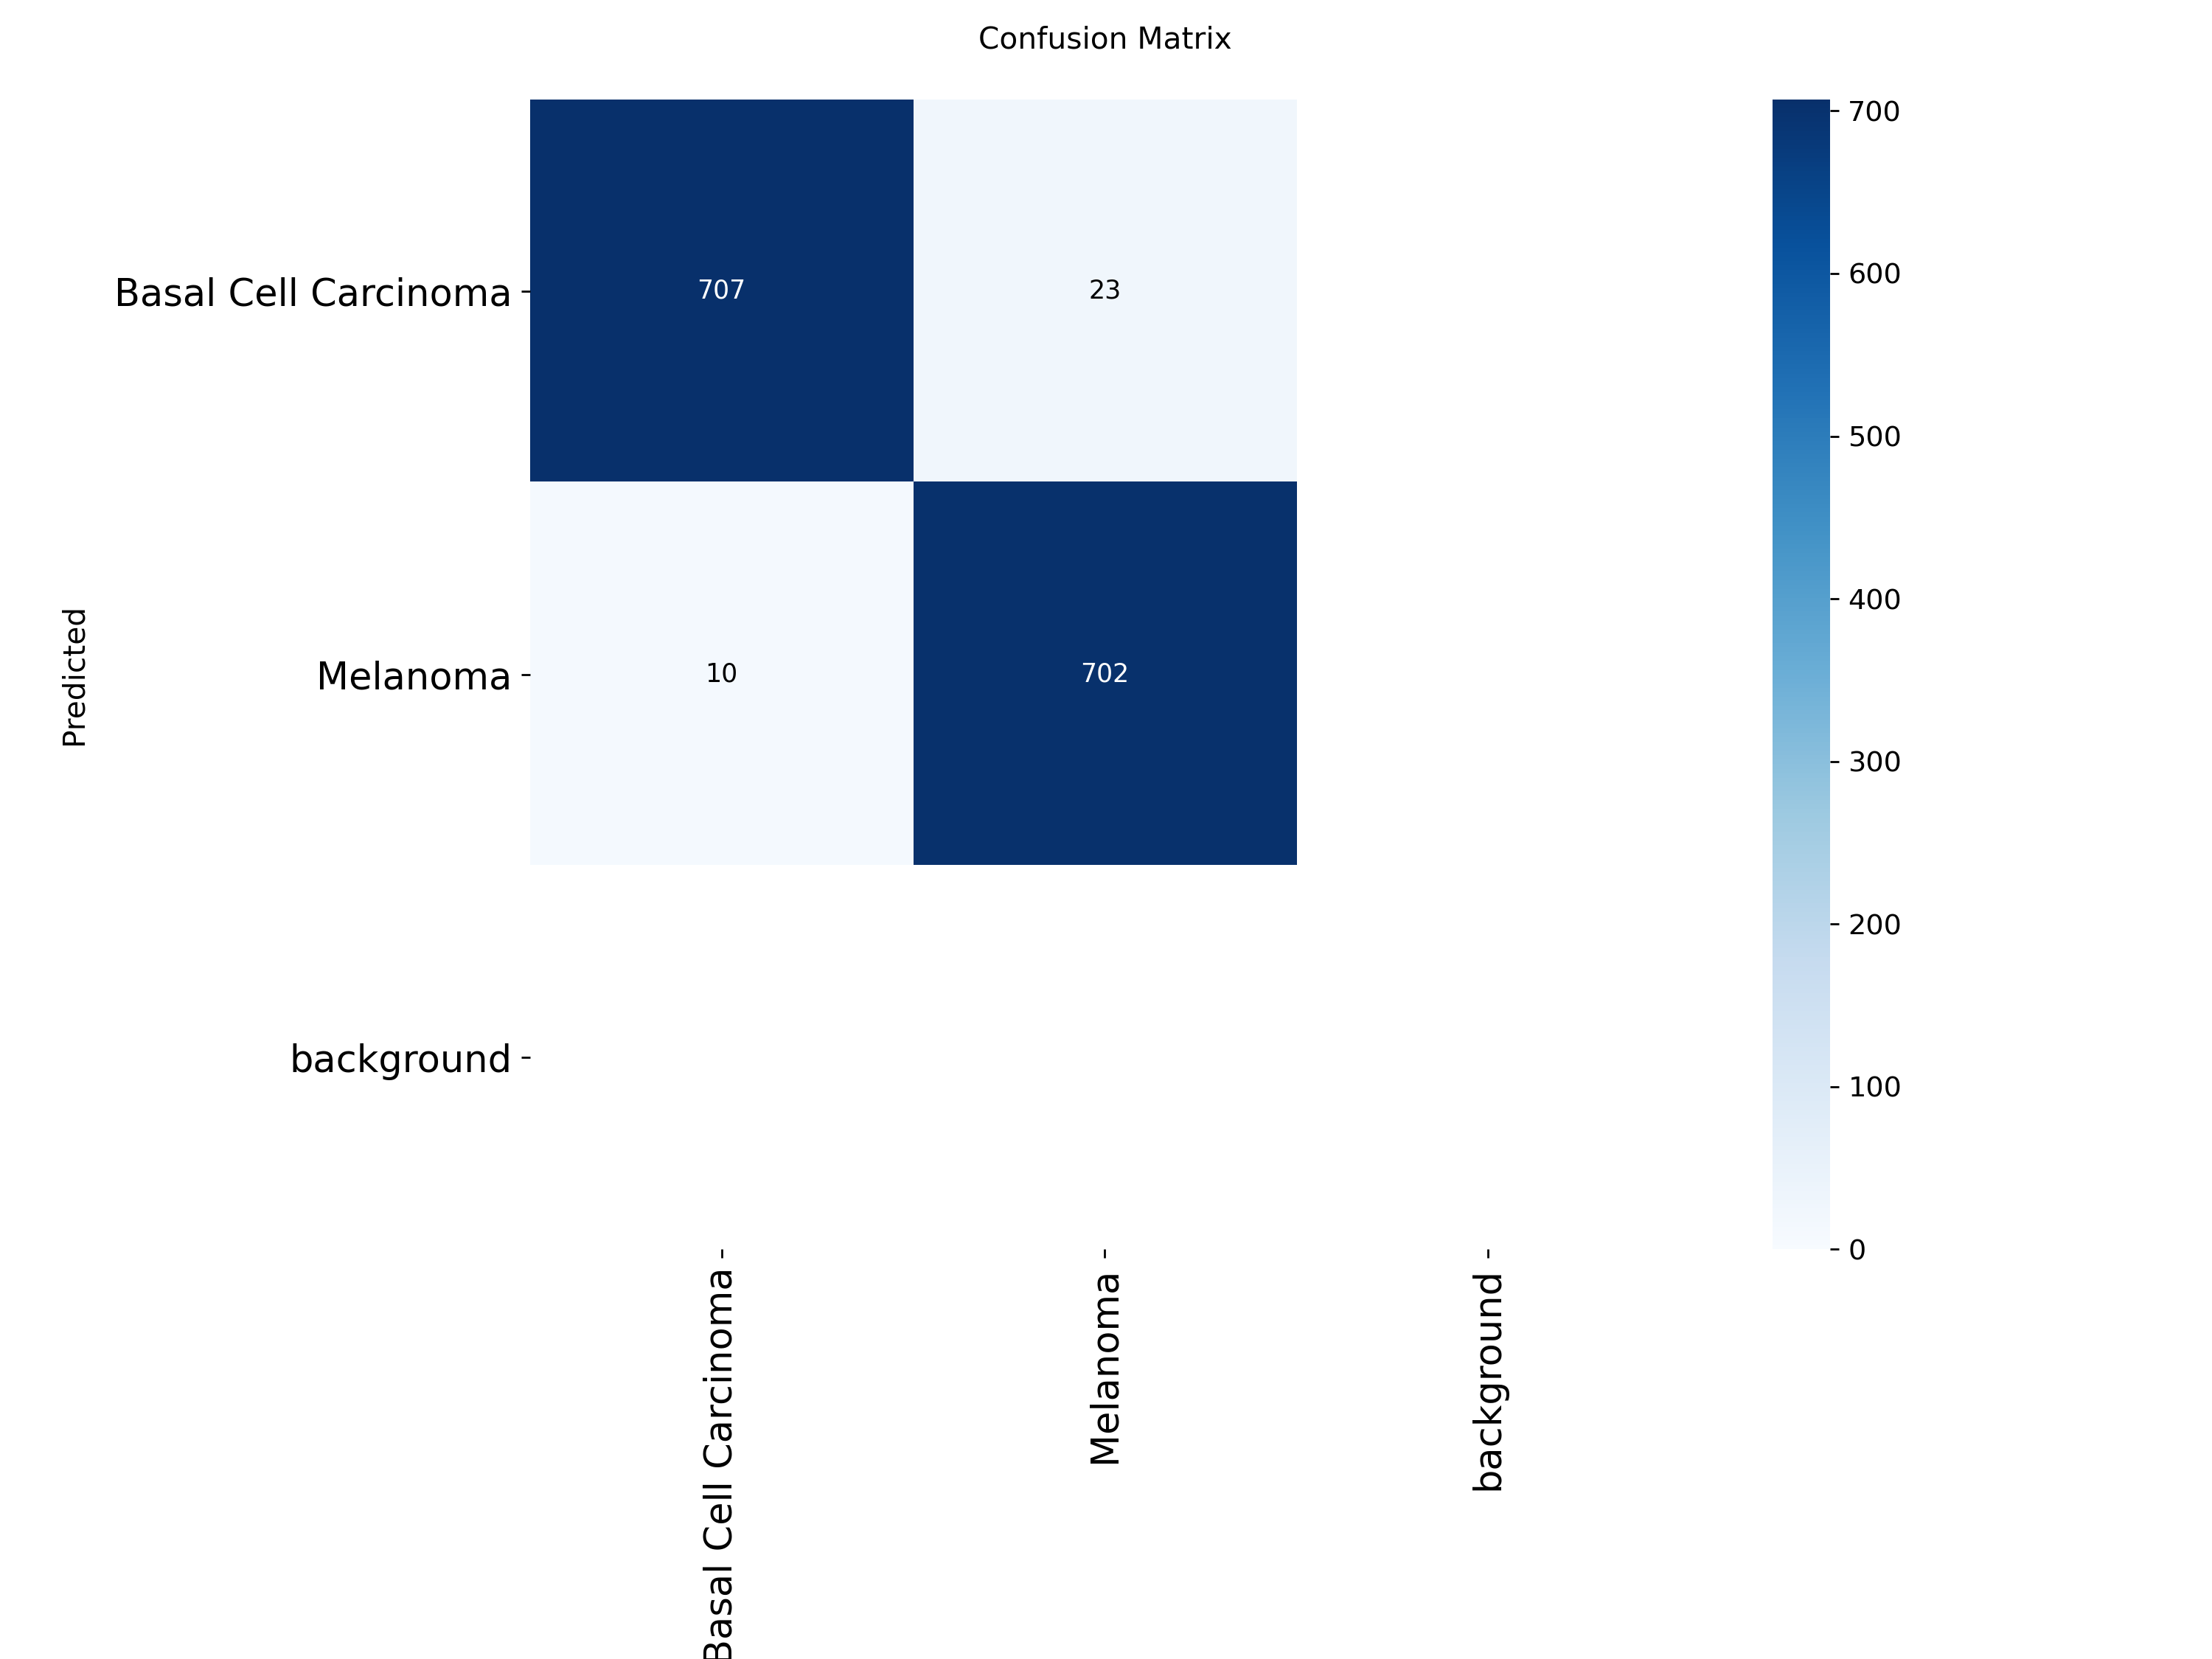

In [5]:
from IPython.display import Image

Image(filename='/content/runs/classify/train3/confusion_matrix.png')